In [18]:
%matplotlib inline
import os
import itertools

import numpy as np
import pandas as pd
import xarray as xr
import matplotlib 
import matplotlib.pyplot as plt

import climatools.plot.plot
from climatools.scripts.g1_threshold import *

import IPython.display as display

In [3]:
analysis = Analysis()

In [9]:
crd = analysis.model('crd')
crd.rundir = os.path.join('/nuwa_cluster/home/jackyu',
                           'radiation/crd/LW/examples',
                           'separate_g_groups',
                           'study__lblnew_g1_threshold',
                           'n2o',
                           'band07_wn_1215_1380',
                           'P_50_T_250',
                           '4.e-21',
                           'tropical')
crd.type_model = 'crd'
crd.linestyle = '-'
crd.load_data()

In [10]:
clirad = analysis.model('clirad')
clirad.rundir = os.path.join('/nuwa_cluster/home/jackyu/radiation',
                             'clirad/LW/examples',
                             '1_0912_mdc_Steve_CLIRAD_lw',
                             'g1_threshold','n2o',
                             'band07_wn_1215_1380',
                             'P_50_T_250',
                             '4.e-21',
                             'tropical',
                             'weight_gk_linear_1_.5_.5_.5')
clirad.type_model = 'clirad'
clirad.linestyle = '--'
clirad.load_data()

In [12]:
fig = analysis.fig_fluxcoolr('fig')
fig.vars_plot['flux'] = ['flug', 'fnetg']
fig.vars_plot['cooling rate'] = ['coolrg']
fig.colors['flug'] = 'darkred'
fig.colors['fnetg'] = 'lightcoral'
fig.colors['coolrg'] = 'blue'
fig.varlims_from_indexrange['linear'] = (50, 1050)
fig.varlims_from_indexrange['log'] = (1e-4, 50)

In [13]:
table_fluxg = analysis.table('table_fluxg')
table_fluxg.sumg = False
table_fluxg.vartype = 'flux'
table_fluxg.at_pressures = crd.data['flux']\
                              .coords['pressure']\
                              .isel(pressure=[0, -1])

table_coolrg = analysis.table('table_coolrg')
table_coolrg.vartype = 'cooling rate'
table_coolrg.sumg = False
table_coolrg.at_pressures = crd.data['cooling rate']\
                               .coords['pressure']\
                               .isel(pressure=[0, -1])

In [14]:
table_flux = analysis.table('table_flux')
table_flux.sumg = True
table_flux.vartype = 'flux'
table_flux.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolr = analysis.table('table_coolr')
table_coolr.vartype = 'cooling rate'
table_coolr.sumg = True
table_coolr.at_pressures = crd.data['cooling rate']\
                              .coords['pressure']\
                              .isel(pressure=[0, -1])

In [15]:
fig.display_hrefanchor()

In [16]:
table_fluxg.display_hrefanchor()
table_coolrg.display_hrefanchor()
table_flux.display_hrefanchor()
table_coolr.display_hrefanchor()

# Figure: flux, cooling rate. g-group 1

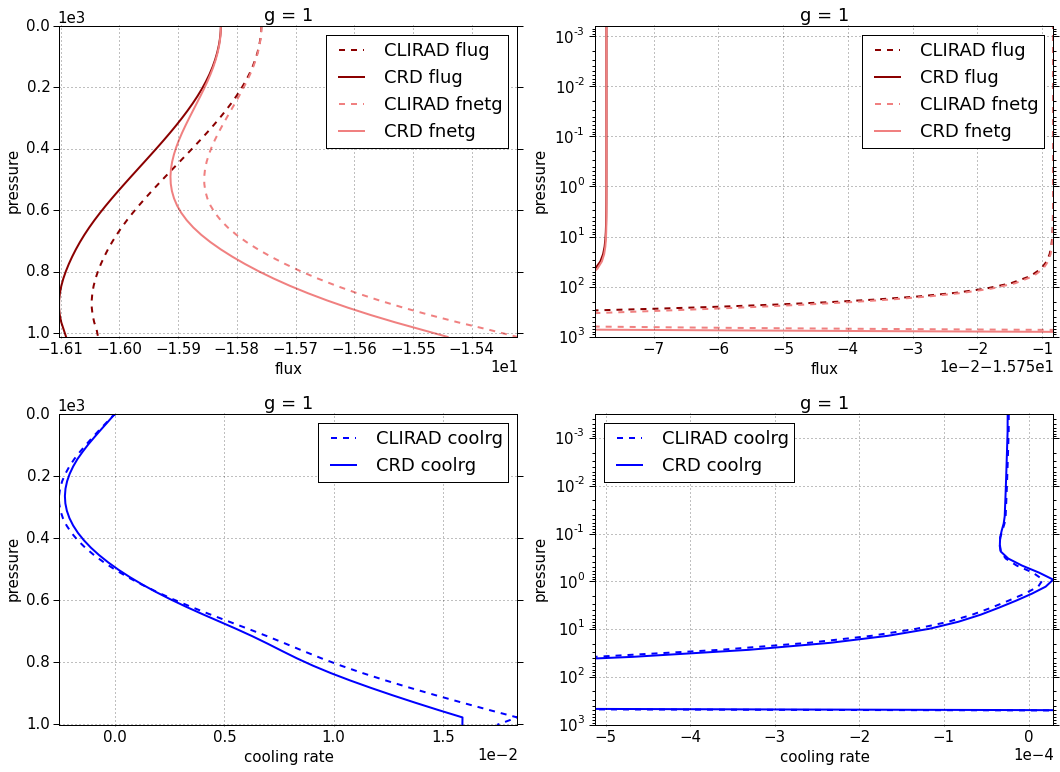

# Figure: flux, cooling rate. g-group 2

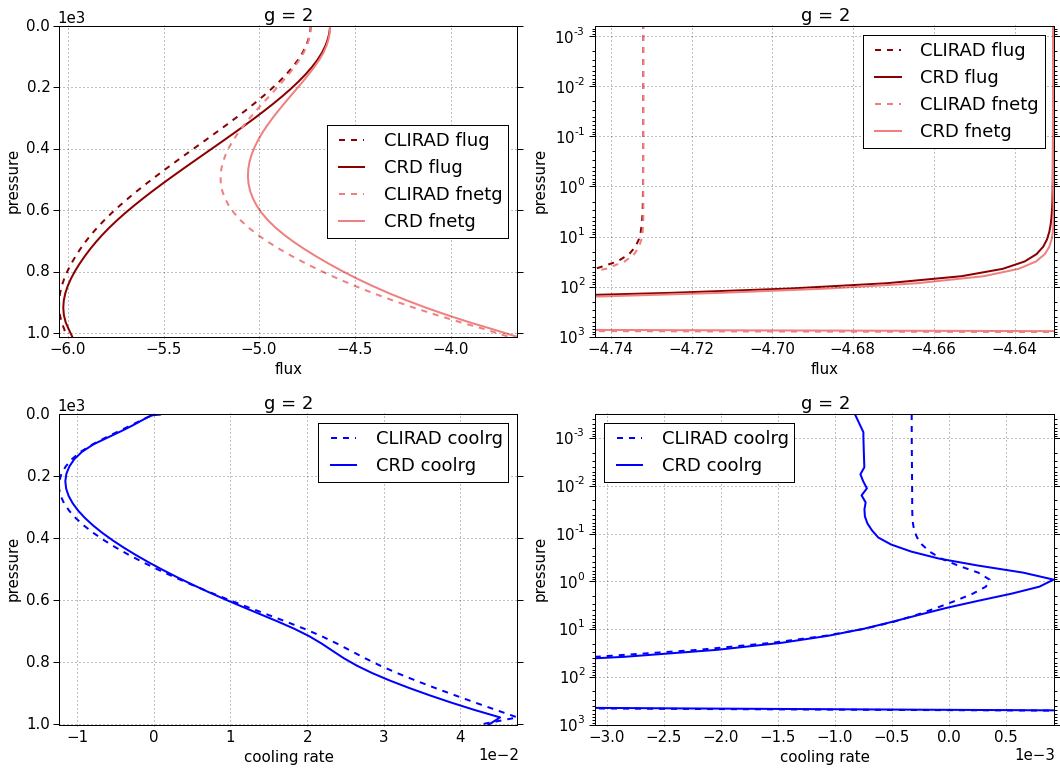

# Figure: flux, cooling rate. g-group 3

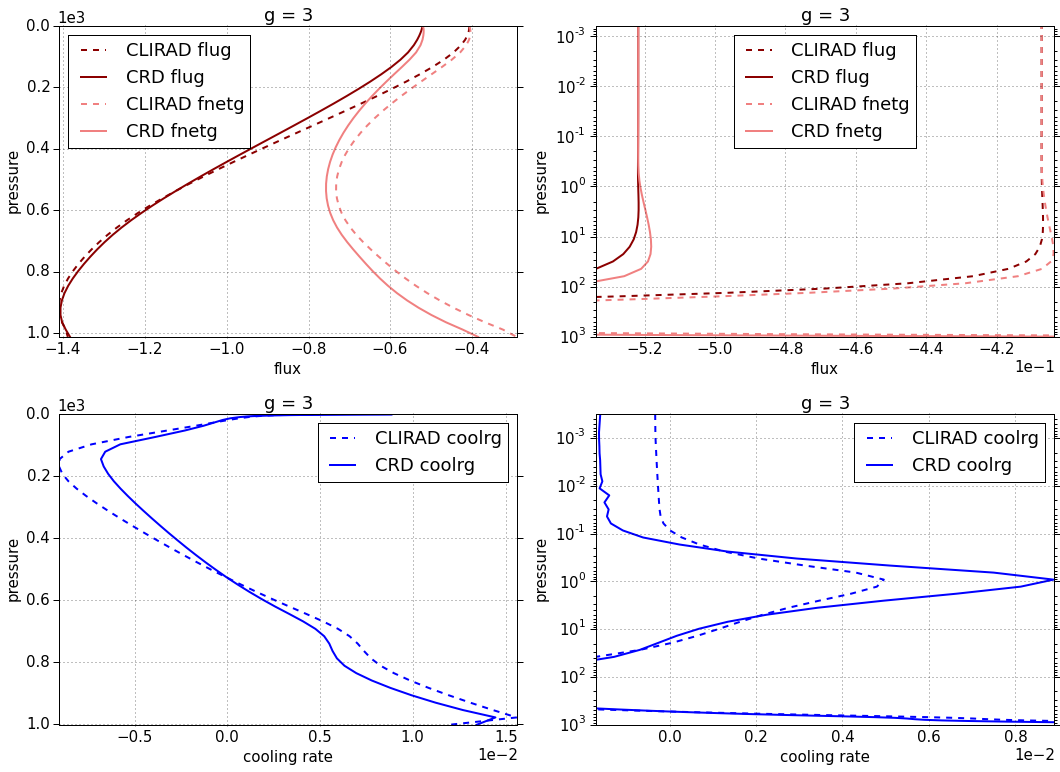

# Figure: flux, cooling rate. g-group 4

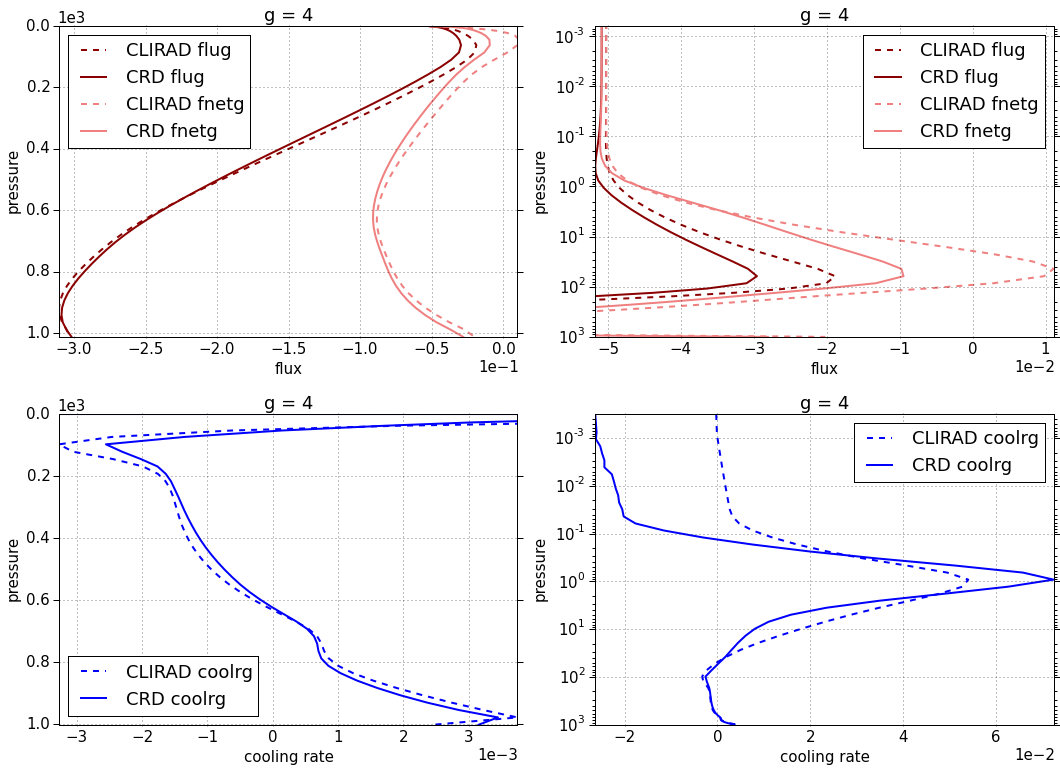

In [19]:
matplotlib.rcParams.update({'font.size': 15,
                            'grid.color': 'black',
                            'axes.facecolor': 'white',
                            'axes.edgecolor': 'black',
                            'ytick.direction': 'out',
                            'ytick.major.size': 6, 'ytick.major.width': 1,
                            'ytick.minor.size': 3, 'ytick.minor.width': 1,
                            'xtick.direction': 'out',
                            'xtick.major.size': 6, 'xtick.major.size': 1,
                            'xtick.minor.size': 3, 'xtick.minor.size': 1}) 

fig.plot(analysis)

In [20]:
table_fluxg.display_withdiff(analysis, benchmark='crd')
table_coolrg.display_withdiff(analysis, benchmark='crd')
table_flux.display_withdiff(analysis, benchmark='crd')
table_coolr.display_withdiff(analysis, benchmark='crd')

# Table: flux. g-groups 


CRD


flug      fldg      fnetg
g pressure level                                
1 0        1     -15.827310  0.000000 -15.827310
  1013     76    -16.090938  0.649856 -15.441082
2 0        1      -4.630500  0.000000  -4.630500
  1013     76     -5.979005  2.329045  -3.649960
3 0        1      -0.521855  0.000000  -0.521855
  1013     76     -1.383483  0.998491  -0.384991
4 0        1      -0.050919  0.000000  -0.050919
  1013     76     -0.301745  0.273657  -0.028088


CLIRAD


flug          fldg      fnetg
g pressure level                                    
1 0        1     -15.758294  2.723788e-13 -15.758294
  1013     76    -16.036479  7.140263e-01 -15.322452
2 0        1      -4.731978  4.979300e-12  -4.731978
  1013     76     -6.011898  2.318019e+00  -3.693879
3 0        1      -0.407194  2.405822e-11  -0.407194
  1013     76     -1.388980  1.098406e+00  -0.290574
4 0        1      -0.050312  5.481804e-10  -0.050312
  1013     76     -0.303245  2.830052e-01  -0.020240


CLIRAD - CRD


flug          fldg     fnetg
g pressure level                                  
1 0        1      0.069016  2.723788e-13  0.069016
  1013     76     0.054459  6.416988e-02  0.118630
2 0        1     -0.101478  4.979300e-12 -0.101478
  1013     76    -0.032892 -1.102570e-02 -0.043918
3 0        1      0.114661  2.405822e-11  0.114661
  1013     76    -0.005498  9.991493e-02  0.094417
4 0        1      0.000607  5.481804e-10  0.000607
  1013     76    -0.001500  9.348520e-03  0.007848

# Table: cooling rate. g-groups 


CRD


coolrg
g pressure    layer          
1 0.000312    1     -0.000025
  1001.112500 75     0.015867
2 0.000312    1     -0.000825
  1001.112500 75     0.043694
3 0.000312    1     -0.001602
  1001.112500 75     0.013427
4 0.000312    1     -0.026308
  1001.112500 75     0.003152


CLIRAD


coolrg
g pressure    layer          
1 0.000312    1     -0.000023
  1001.112500 75     0.017454
2 0.000312    1     -0.000326
  1001.112500 75     0.042420
3 0.000312    1     -0.000332
  1001.112500 75     0.011941
4 0.000312    1     -0.000259
  1001.112500 75     0.002448


CLIRAD - CRD
Model indices not identical to benchmark indices, forcing model indices to be the same as benchmark's


coolrg
g pressure    layer          
1 0.000312    1      0.000001
  1001.112500 75     0.001587
2 0.000312    1      0.000499
  1001.112500 75    -0.001274
3 0.000312    1      0.001270
  1001.112500 75    -0.001486
4 0.000312    1      0.026049
  1001.112500 75    -0.000704

# Table: flux. g-groups total


CRD


,,flug,fldg,fnetg
pressure,level,,,
0,1,-21.030584,0.000000,-21.030584
1013,76,-23.755171,4.251049,-19.504122



CLIRAD


,,flug,fldg,fnetg
pressure,level,,,
0,1,-20.947778,5.774903e-10,-20.947778
1013,76,-23.740602,4.413457e+00,-19.327144



CLIRAD - CRD


,,flug,fldg,fnetg
pressure,level,,,
0,1,0.082806,5.774903e-10,0.082806
1013,76,0.014569,1.624076e-01,0.176977


# Table: cooling rate. g-groups total


CRD


,,coolrg
pressure,layer,
0.000312,1,-0.028759
1001.112500,75,0.076139



CLIRAD


,,coolrg
pressure,layer,
0.000312,1,-0.000939
1001.112500,75,0.074262



CLIRAD - CRD
Model indices not identical to benchmark indices, forcing model indices to be the same as benchmark's


,,coolrg
pressure,layer,
0.000312,1,0.027820
1001.112500,75,-0.001877


In [22]:
display.HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')